## Chapter 14: Tree-based learners

# 14.2  From Stumps to Deep Trees

You can toggle the code on and off in this presentation via the button below.

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In Section 11.1 we saw the simplest exemplar of a tree-based learner: the stump. In this Section we discuss how, using simple stumps, we can define general and more complex tree-based universal approximators in a recursive manner.

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import math_optimization_library as optlib

from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

static_plotter = optlib.static_plotter.Visualizer()
regress_plotter = nonlib.nonlinear_regression_demos


# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# plotting
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

## The stump

The most basic tree-based universal approximator, the stump, is a simple step function with three parameters:

- two step levels or *leaf* parameters denoted by $v_1$ and $v_2$ (whose values are set independently of one another), and
- a split point parameter $s$ defining the boundary between the two levels.

\begin{equation}
f\left(x\right)=\begin{cases}
\begin{array}{c}
v_{1}\\
v_{2}
\end{array} & \begin{array}{c}
x < s\\
x>s
\end{array}\end{cases}
\end{equation}     

 In the right panel of this Figure we show another graphical representation of Equation (1) which helps explain the particular nomenclature (tree, leaf, etc.) used in the context of tree-based approximators. Represented this way, the stump can be thought of as a binary tree structure of depth one with $f(x)$ as its root node, and $v_1$ and $v_2$ as its leaf nodes. Conceptually speaking there are two approaches to building more flexible (or *deeper*) trees using stumps, which we discuss next. 

<img src= '../../mlrefined_images/nonlinear_superlearn_images/tree_depth_1.png' width="85%" height="65%" alt=""/>

(left) A simple stump has three parameters: $v_1$, $v_2$, and $s$. (right) An illustration of a stump function as a binary tree structure of depth one. 

## Creating deep trees via recursion

Given a depth one tree (a stump), each leaf can be recursively split up into two new leaves, introducing two new split points and creating a total of four distinct leaves. 

<img src= '../../mlrefined_images/nonlinear_superlearn_images/tree_depth_2.png' width="85%" height="65%" alt=""/>

- Using recursion we can construct deeper trees in a similar manner.

- The deeper a tree becomes the more capacity it gains, being able to take on a wider variety of shapes.

- In the following example, we visualize $4$ instances of a depth $D=2$ tree (top row) with $4$ instances of a depth $D=10$ tree where all parameters are set randomly.

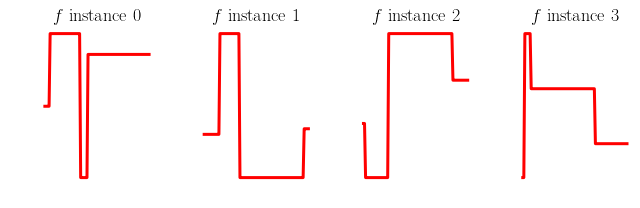

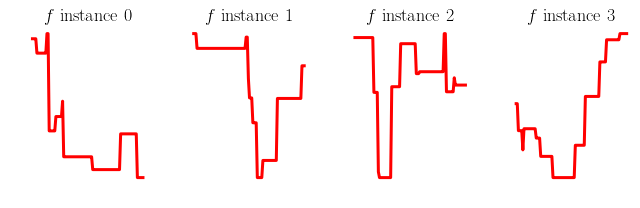

In [3]:
## This code cell will not be shown in the HTML version of this notebook
def build_stump(s,L1,L2,x):
    stump = []
    for pt in x:
        if pt < s:
            stump.append(L1)
        else:
            stump.append(L2)
    stump = np.array(stump).flatten()
    return stump

def build_random_tree(D):    
    # input space
    x = np.linspace(0,1,100)
    
    # build tree
    fm = np.zeros((100,1)).flatten()
    for d in range(D):
        # make stump element
        s = np.random.rand(1)
        L1 = np.random.randn(1)
        L2 = np.random.randn(1)
        new = build_stump(s,L1,L2,x)
        
        # add to current
        fm += new
    return fm

def plot_trees(D,num_instances):
    # figure
    fig = plt.figure(figsize = (9,3))
    x = np.linspace(0,1,100)

    # loop over and create instances
    for n in range(num_instances):
        # create tree 
        fm = build_random_tree(D)
        
        # plot the current element
        ax = fig.add_subplot(1,num_instances,n+1)
        ax.plot(x,fm,c='r',zorder = 3,linewidth = 3)
        ax.set_title('$f$ instance ' + str(n),fontsize = 18)

        # clean up plot
        ax.grid(True, which='both')
        #ax.axhline(y=0, color='k')
        #ax.axvline(x=0, color='k')
        ax.axis('off')
    plt.show()
    
# use plotting tool
D = 2
num_stumps = D + 1
num_instances = 4
plot_trees(num_stumps,num_instances)


# use plotting tool
D = 10
num_stumps = D + 1
num_instances = 4
plot_trees(num_stumps,num_instances)

## Creating high capacity trees via addition

Deeper, more flexible trees can also be constructed via *addition* of shallower trees in general, and stumps in particular.

<img src= '../../mlrefined_images/nonlinear_superlearn_images/tree_addition.png' width="85%" height="65%" alt=""/>

(left) Three stumps, each depicted in a distinct color. (right) A depth two tree (in black), made via addition of the three depth one trees shown in the left panel.

## Human interpretability

- Given their particularly simple structure, shallow tree-based units are often easy to interpret by humans, in comparison to their fixed-shape and neural network counterparts.

- However, this feature of tree-based units quickly dissipates as the depth of a tree is increased as well as when trees are combined or ensembled together.

Although Equation (1) shows the most common way of parameterizing a simple stump, it is also possible to write a stump in a slightly different but equivalent way, replacing the leaf parameters with what can be interpreted as a bias and a weight, in a manner resembling what we have seen before with fixed-shape and neural network approximators. More specifically, the stump in Equation (1) can be written as

\begin{equation}
f(x) = b + w\,h(x)
\end{equation}


where $b$ represents the bias parameter, $w$ is the weight attached to $h(x)$, and $h$ itself is a step function with fixed levels and a split at $x=s$ 

\begin{equation}
h\left(x\right)=\begin{cases}
\begin{array}{c}
0 \\
1
\end{array} & \begin{array}{c}
x<s\\
x>s
\end{array}\end{cases}
\end{equation}
 
This alternative perspective is particularly is useful in the context of boosting as discussed previously in Chapter 11.